In [1]:
%load_ext watermark
%watermark

2019-03-12T21:57:40-04:00

CPython 3.6.8
IPython 6.2.1

compiler   : GCC 7.3.0
system     : Linux
release    : 4.15.0-46-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [2]:
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import folium
import numpy as np
%matplotlib notebook

In [3]:
df = pd.read_csv('./boston.csv')

In [4]:
df = df.rename(columns={
    "TOWN":"CIUDAD",
    "CRIM":"INDICE_CRIMEN",
    "ZN":"PCT_ZONA_RESIDENCIAL",
    "INDUS":"PCT_ZONA_INDUSTRIAL",
    "CHAS":"RIO_CHARLES",
    "NOX":"OXIDO_NITROSO_PPM",
    "RM":"N_HABITACIONES_MEDIO",
    "AGE":"PCT_CASAS_40S",
    "DIS_EMPLEO":"DISTANCIA_CENTRO_EMPLEO",
    "RAD":"DIS_AUTOPISTAS",
    "TAX":"CARGA_FISCAL",
    "PTRATIO":"RATIO_PROFESORES",
    "B":"PCT_NEGRA",
    "MEDV":"VALOR_MEDIANO",
    "LSTAT":"PCT_CLASE_BAJA"
})
df.head()

,CIUDAD,LON,LAT,VALOR_MEDIANO,INDICE_CRIMEN,PCT_ZONA_RESIDENCIAL,PCT_ZONA_INDUSTRIAL,RIO_CHARLES,OXIDO_NITROSO_PPM,N_HABITACIONES_MEDIO,PCT_CASAS_40S,DIS,DIS_AUTOPISTAS,CARGA_FISCAL,RATIO_PROFESORES,PCT_NEGRA,PCT_CLASE_BAJA
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


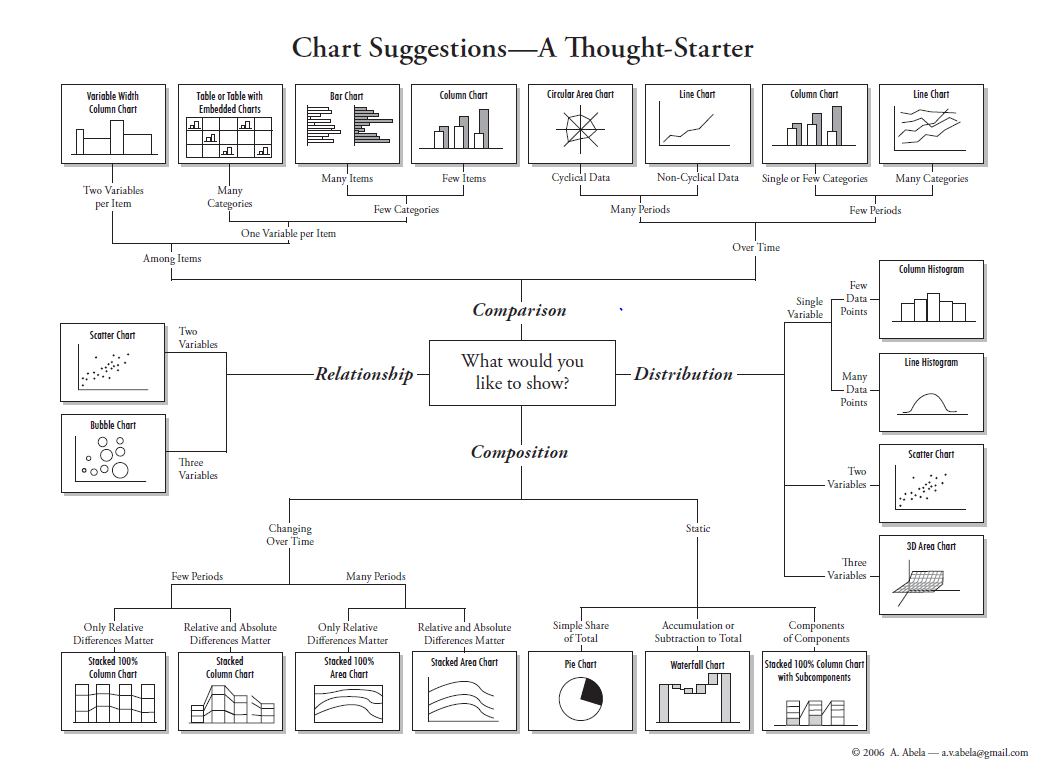

In [5]:
Image('./chart-chooser-data-visualization.png')

In [6]:
plt.style.use('ggplot')

Text(0.5,0,'ROOM MEAN')

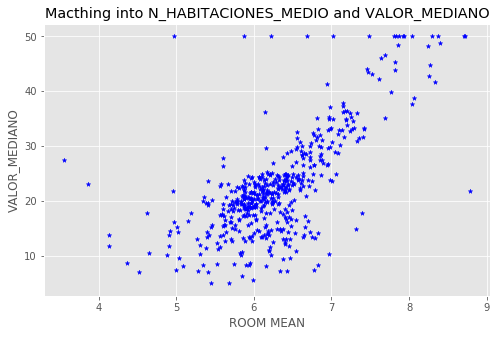

In [7]:
df.plot.scatter(x='N_HABITACIONES_MEDIO', y='VALOR_MEDIANO', color='b', marker="*", figsize=(8,5))
plt.title("Macthing into N_HABITACIONES_MEDIO and VALOR_MEDIANO")
plt.xlabel("ROOM MEAN")

In [8]:
plt.style.available

['fast',
 'seaborn-notebook',
 'seaborn-colorblind',
 'seaborn-white',
 '_classic_test',
 'seaborn-pastel',
 'seaborn-muted',
 'seaborn-bright',
 'bmh',
 'seaborn-poster',
 'ggplot',
 'Solarize_Light2',
 'seaborn-dark-palette',
 'grayscale',
 'seaborn-whitegrid',
 'tableau-colorblind10',
 'fivethirtyeight',
 'seaborn-ticks',
 'seaborn-dark',
 'classic',
 'seaborn-darkgrid',
 'seaborn-talk',
 'dark_background',
 'seaborn',
 'seaborn-paper',
 'seaborn-deep']

In [9]:
from ipywidgets import interact
import seaborn as sns
import bokeh.plotting as bk
import altair as alt

In [10]:
@interact(col1=df.columns.tolist())
def create_plot(col1):
    df.plot.scatter(x=col1, y="N_HABITACIONES_MEDIO")
    plt.title(f'{col1} and N_HABITACIONES_MEDIO')

interactive(children=(Dropdown(description='col1', options=('CIUDAD', 'LON', 'LAT', 'VALOR_MEDIANO', 'INDICE_C…

In [11]:
%matplotlib notebook

<IPython.core.display.Javascript object>


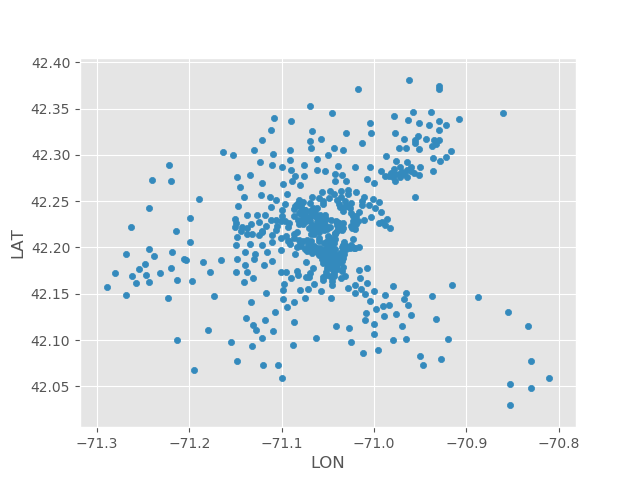

In [12]:
df.plot.scatter(x="LON", y='LAT')

In [ ]:
lng = df.LON.quantile(0.25)
lat = df.LAT.quantile(0.75)

m = folium.Map(
    location=[lat,lng],
    zoom_start=9,
    tiles='Stamen Terrain'
)

for i in range(df.LON.count()):
    folium.Marker([df.LAT.loc[i], df.LON.loc[i]], popup=f"<b>{df.VALOR_MEDIANO.loc[i]}</b>", tooltip=f'{df.CIUDAD.loc[i]}').add_to(m)
m

In [13]:
df.head()

,CIUDAD,LON,LAT,VALOR_MEDIANO,INDICE_CRIMEN,PCT_ZONA_RESIDENCIAL,PCT_ZONA_INDUSTRIAL,RIO_CHARLES,OXIDO_NITROSO_PPM,N_HABITACIONES_MEDIO,PCT_CASAS_40S,DIS,DIS_AUTOPISTAS,CARGA_FISCAL,RATIO_PROFESORES,PCT_NEGRA,PCT_CLASE_BAJA
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


<IPython.core.display.Javascript object>


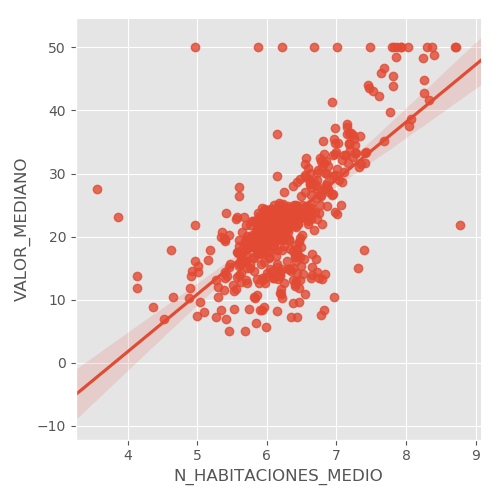

/home/eddydecena/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [14]:
%matplotlib notebook
sns.lmplot(x='N_HABITACIONES_MEDIO', y='VALOR_MEDIANO', data=df)

In [8]:
%matplotlib inline
sns.heatmap(df.corr())

NameError: name 'df' is not defined

In [15]:
bk.output_notebook()

Loading BokehJS ...

In [16]:
df.head()

,CIUDAD,LON,LAT,VALOR_MEDIANO,INDICE_CRIMEN,PCT_ZONA_RESIDENCIAL,PCT_ZONA_INDUSTRIAL,RIO_CHARLES,OXIDO_NITROSO_PPM,N_HABITACIONES_MEDIO,PCT_CASAS_40S,DIS,DIS_AUTOPISTAS,CARGA_FISCAL,RATIO_PROFESORES,PCT_NEGRA,PCT_CLASE_BAJA
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [17]:
df['CRIMEN_QUINTIL'] = pd.qcut(df.INDICE_CRIMEN, 5)
df.head()

,CIUDAD,LON,LAT,VALOR_MEDIANO,INDICE_CRIMEN,PCT_ZONA_RESIDENCIAL,PCT_ZONA_INDUSTRIAL,RIO_CHARLES,OXIDO_NITROSO_PPM,N_HABITACIONES_MEDIO,PCT_CASAS_40S,DIS,DIS_AUTOPISTAS,CARGA_FISCAL,RATIO_PROFESORES,PCT_NEGRA,PCT_CLASE_BAJA,CRIMEN_QUINTIL
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,"(0.00532, 0.0642]"
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,"(0.00532, 0.0642]"
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,"(0.00532, 0.0642]"
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,"(0.00532, 0.0642]"
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,"(0.0642, 0.15]"


In [18]:
from bokeh.palettes import brewer

colors = brewer['Spectral'][len(df['CRIMEN_QUINTIL'].cat.categories)]

In [19]:
fig = bk.Figure(
    plot_width=600,
    plot_height=600,
    title="Any"
)

for i, quintil in enumerate(df['CRIMEN_QUINTIL'].cat.categories):
    df_q = df[df.CRIMEN_QUINTIL == quintil]
    fig.scatter(df_q.N_HABITACIONES_MEDIO, df_q.VALOR_MEDIANO, color=colors[i], legend=f'{quintil.left}.{quintil.right}')
    
bk.show(fig)

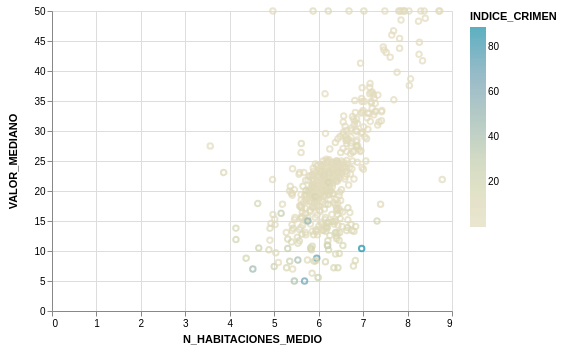

In [20]:
alt.renderers.enable('notebook')
chart = alt.Chart(df[['N_HABITACIONES_MEDIO','VALOR_MEDIANO', 'INDICE_CRIMEN']])

scale = alt.Scale(range=['#E2DBBE', '#D5D6AA', '#9DBBAE', '#769FB6', '#188FA7'])

chart.mark_point().encode(
    x='N_HABITACIONES_MEDIO',
    y='VALOR_MEDIANO',
    color=alt.Color('INDICE_CRIMEN', scale=scale)
)

In [21]:
alt.__version__

'2.4.1'